### Działanie sztucznego neuronu ze skokową funkcją aktywacyjną

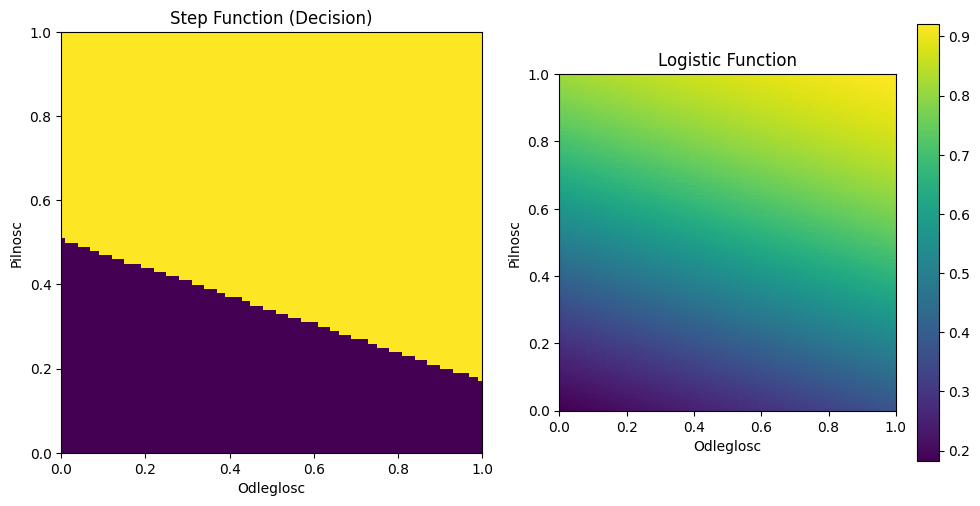

In [16]:
import numpy as np
from matplotlib import pyplot as plt

# Create a grid of values
x = np.arange(0, 1, 0.01)
y = x.copy()
X, Y = np.meshgrid(x, y)

# Define weights and similarity score
wx, wy = 0.1, 0.3
S = wx * X + wy * Y

# Step function (binary decision)
out_step = S > 0.15

# Logistic function
out_logistic = 1 / (1 + np.exp(-10 * (S - 0.15)))

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Left plot: Step function
axs[0].imshow(out_step, cmap="viridis", origin="lower", extent=[0, 1, 0, 1])
axs[0].set_title("Step Function (Decision)")
axs[0].set_xlabel("Odleglosc")
axs[0].set_ylabel("Pilnosc")

# Right plot: Logistic function
c = axs[1].imshow(out_logistic, cmap="viridis", origin="lower", extent=[0, 1, 0, 1])
axs[1].set_title("Logistic Function")
axs[1].set_xlabel("Odleglosc")
axs[1].set_ylabel("Pilnosc")

# Add colorbar to logistic plot
fig.colorbar(c, ax=axs[1])

plt.tight_layout()
plt.show()


### Praktyczna implementacja za pomocą biblioteki Keras

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,835 (34.51 KB)

 Trainable params: 8,835 (34.51 KB)

 Non-trainable params: 0 (0.00 B)

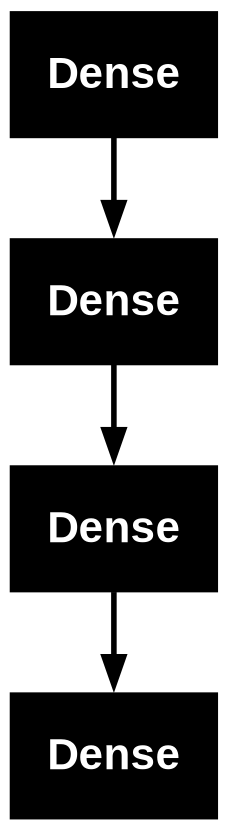

In [17]:
from sklearn.datasets import load_iris
import pandas as pd
data = load_iris()
y, X = data.target, data.data
y = pd.Categorical(y)
y = pd.get_dummies(y)
class_num = y.shape[1]
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.utils import plot_model

# Define the model
model = Sequential()
model.add(Input(shape=(X.shape[1],)))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(class_num, activation="softmax"))

# Compile the model
learning_rate = 0.0001
model.compile(optimizer=Adam(learning_rate), loss="categorical_crossentropy", metrics=["accuracy"])

# Print the model summary
model.summary()

# Plot the model
plot_model(model, to_file="my_model.png")

### Przykład uczenia sieci neuronowej

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/500
4/4 - 3s - 709ms/step - accuracy: 0.4333 - loss: 1.0701 - val_accuracy: 0.6667 - val_loss: 1.0332
Epoch 2/500
4/4 - 0s - 22ms/step - accuracy: 0.4833 - loss: 1.0572 - val_accuracy: 0.7000 - val_loss: 1.0213
Epoch 3/500
4/4 - 0s - 23ms/step - accuracy: 0.5250 - loss: 1.0454 - val_accuracy: 0.7333 - val_loss: 1.0090
Epoch 4/500
4/4 - 0s - 23ms/step - accuracy: 0.6083 - loss: 1.0330 - val_accuracy: 0.7667 - val_loss: 0.9973
Epoch 5/500
4/4 - 0s - 22ms/step - accuracy: 0.6667 - loss: 1.0204 - val_accuracy: 0.8000 - val_loss: 0.9857
Epoch 6/500
4/4 - 0s - 21ms/step - accuracy: 0.7167 - loss: 1.0079 - val_accuracy: 0.8333 - val_loss: 0.9740
Epoch 7/500
4/4 - 0s - 20ms/step - accuracy: 0.7667 - loss: 0.9955 - val_accuracy: 0.8333 - val_loss: 0.9620
Epoch 8/500
4/4 - 0s - 22ms/step - accuracy: 0.8000 - loss: 0.9830 - val_accuracy: 0.9000 - val_loss: 0.9503
Epoch 9/500
4/4 - 0s - 20ms/step - accuracy: 0.8083 - loss: 0.9703 - val_accuracy: 0.8667 - val_loss: 0.9387
Epoch 10/500
4/4 -

### Pobranie historii uczenia modelu oraz jego wizualizacja

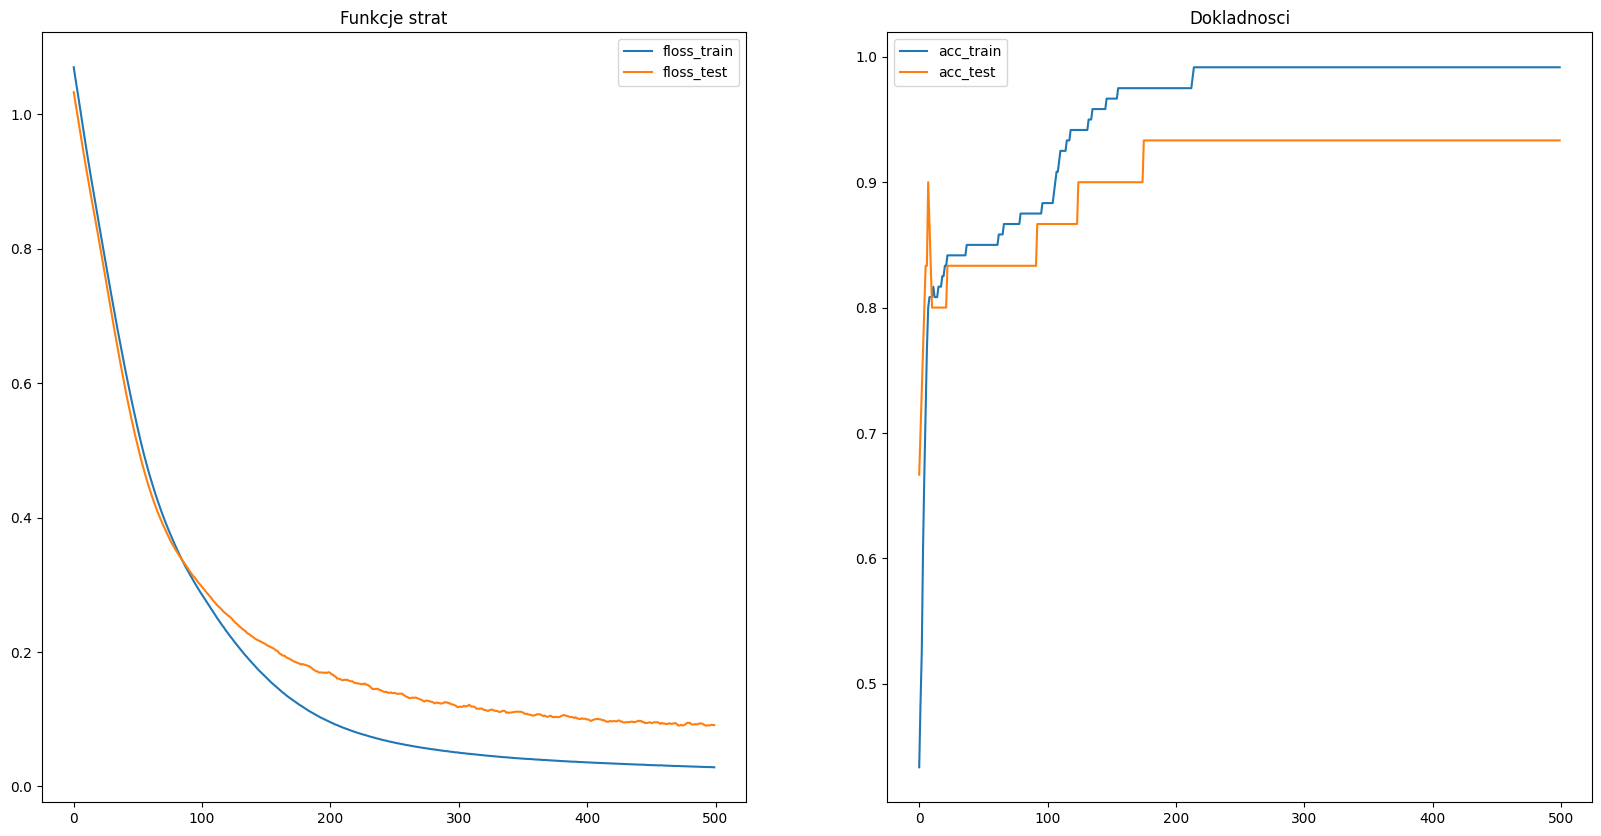

In [20]:
from matplotlib import pyplot as plt
import numpy as np
historia = model.history.history
floss_train = historia['loss']
floss_test = historia['val_loss']
acc_train = historia['accuracy']
acc_test = historia['val_accuracy']
fig,ax = plt.subplots(1,2, figsize=(20,10))
epochs = np.arange(0, 500)
ax[0].plot(epochs, floss_train, label = 'floss_train')
ax[0].plot(epochs, floss_test, label = 'floss_test')
ax[0].set_title('Funkcje strat')
ax[0].legend()
ax[1].set_title('Dokladnosci')
ax[1].plot(epochs, acc_train, label = 'acc_train')
ax[1].plot(epochs, acc_test, label = 'acc_test')
ax[1].legend()

### Zastosowanie walidacji krzyżowej


In [ ]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
accs = []
scaler = StandardScaler()

# Convert y_train to numpy array if it is a pandas DataFrame or Series
y_train = np.array(y_train)

for train_index, test_index in KFold(5).split(X_train):
    X_train_cv = X_train[train_index, :]
    X_test_cv = X_train[test_index, :]
    y_train_cv = y_train[train_index]
    y_test_cv = y_train[test_index]
    
    X_train_cv = scaler.fit_transform(X_train_cv)
    X_test_cv = scaler.transform(X_test_cv)
    
    model.fit(X_train_cv, y_train_cv, batch_size=32, epochs=100, validation_data=(X_test_cv, y_test_cv), verbose=2)
    
    y_pred = model.predict(X_test_cv).argmax(axis=1)
    y_test_cv = y_test_cv.argmax(axis=1)
    
    accs.append(accuracy_score(y_test_cv, y_pred))

Epoch 1/100
3/3 - 0s - 62ms/step - accuracy: 0.9583 - loss: 0.3839 - val_accuracy: 0.9583 - val_loss: 0.1606
Epoch 2/100
3/3 - 0s - 34ms/step - accuracy: 0.9792 - loss: 0.2922 - val_accuracy: 1.0000 - val_loss: 0.0284
Epoch 3/100
3/3 - 0s - 30ms/step - accuracy: 0.9896 - loss: 0.2345 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 4/100
3/3 - 0s - 31ms/step - accuracy: 0.9896 - loss: 0.2273 - val_accuracy: 1.0000 - val_loss: 0.0179
Epoch 5/100
3/3 - 0s - 39ms/step - accuracy: 0.9896 - loss: 0.2090 - val_accuracy: 0.9583 - val_loss: 0.1581
Epoch 6/100
3/3 - 0s - 30ms/step - accuracy: 0.9896 - loss: 0.1927 - val_accuracy: 0.9583 - val_loss: 0.3152
Epoch 7/100
3/3 - 0s - 29ms/step - accuracy: 0.9792 - loss: 0.1808 - val_accuracy: 0.9583 - val_loss: 0.4457
Epoch 8/100
3/3 - 0s - 29ms/step - accuracy: 0.9792 - loss: 0.1709 - val_accuracy: 0.9583 - val_loss: 0.5086
Epoch 9/100
3/3 - 0s - 30ms/step - accuracy: 0.9896 - loss: 0.1549 - val_accuracy: 0.9583 - val_loss: 0.5664
Epoch 10/100
3/3 - 